# Inicio

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

from scipy.stats import mannwhitneyu

from src.auxiliares import remover_outliers
from src.config import PASTA_DADOS, DADOS_ORIGINAIS, DADOS_TRATADOS
from src.models import RANDOM_STATE

sns.set_theme(palette="bright", font_scale=1.2)

# Exploração Básica

In [2]:
df = pd.read_csv(DADOS_ORIGINAIS, compression="zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Nenhum valor vazio, mas por via das dúvidas:

In [5]:
df.isnull().sum().sort_values(ascending=False)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
with pd.option_context('display.max_columns', None,
                       'display.float_format', "{:.2f}".format):
    display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Note que é evidente um pré-processamento de padronização, pois todas _features_ do tipo Vx tem média 0; porém é notável desvios despadronizados. Entretanto, é um procedimento que pouco ou nada se preocupa com os limites ou escala, pois os mínimos e máximos variam bastante.

Interessante o valor mínimo de transações igual a 0, veja a coluna Amount:

In [7]:
df[df == 0].count().sort_values(ascending=False)

Class     284315
Amount      1825
Time           2
V3             0
V4             0
V1             0
V2             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V5             0
V6             0
V14            0
V13            0
V15            0
V16            0
V19            0
V20            0
V17            0
V18            0
V22            0
V21            0
V23            0
V24            0
V26            0
V25            0
V28            0
V27            0
dtype: int64

Há desbalanceamento?

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

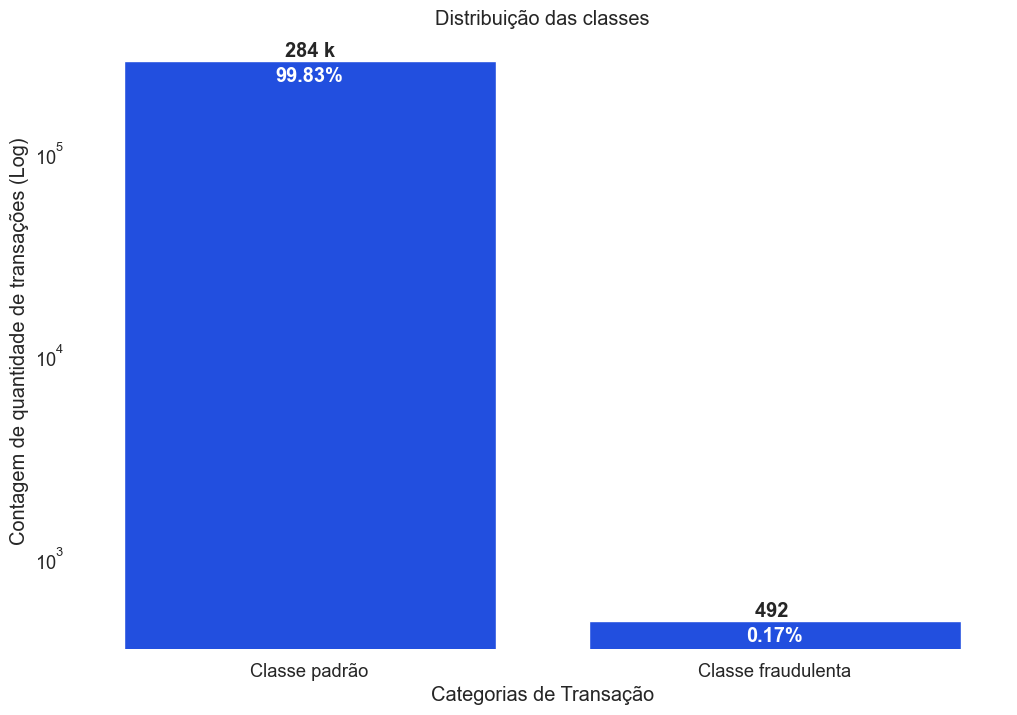

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

# Gráfico
# sns.set_theme(style="white", 
#               palette="bright",
#               font_scale=1.2)


sns.countplot(
    data=df, x="Class",
    ax=ax
)

# Formatação 

## formatação de engenharia
eng_fmt = EngFormatter(places=0)
ax.yaxis.set_major_formatter(eng_fmt)
ax.set_yscale("log")

ax.bar_label(
    ax.containers[0], 
    label_type="edge", weight="bold",
    labels=map(eng_fmt.format_eng, 
               df["Class"].value_counts())
)

ax.bar_label(
    ax.containers[0], 
    label_type="edge", weight="bold", color='white',
    labels=map(lambda n: f"{n:.2%}", 
               df["Class"].value_counts(normalize=True)),
    padding=-18
)

ax.set_xticks(df['Class'].unique())
ax.set_xticklabels(["Classe padrão", "Classe fraudulenta"])

# Finalização

ax.set_title("Distribuição das classes")
ax.set_xlabel("Categorias de Transação")
ax.set_ylabel("Contagem de quantidade de transações (Log)")

plt.box(False)
plt.grid(True, axis="y")
plt.show()

# Exploração Guiada

filtragem inteligente:

In [11]:
df_sample = df.groupby("Class").sample(n=400, random_state=RANDOM_STATE)
df_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


Distribuição dos dados por _feature_

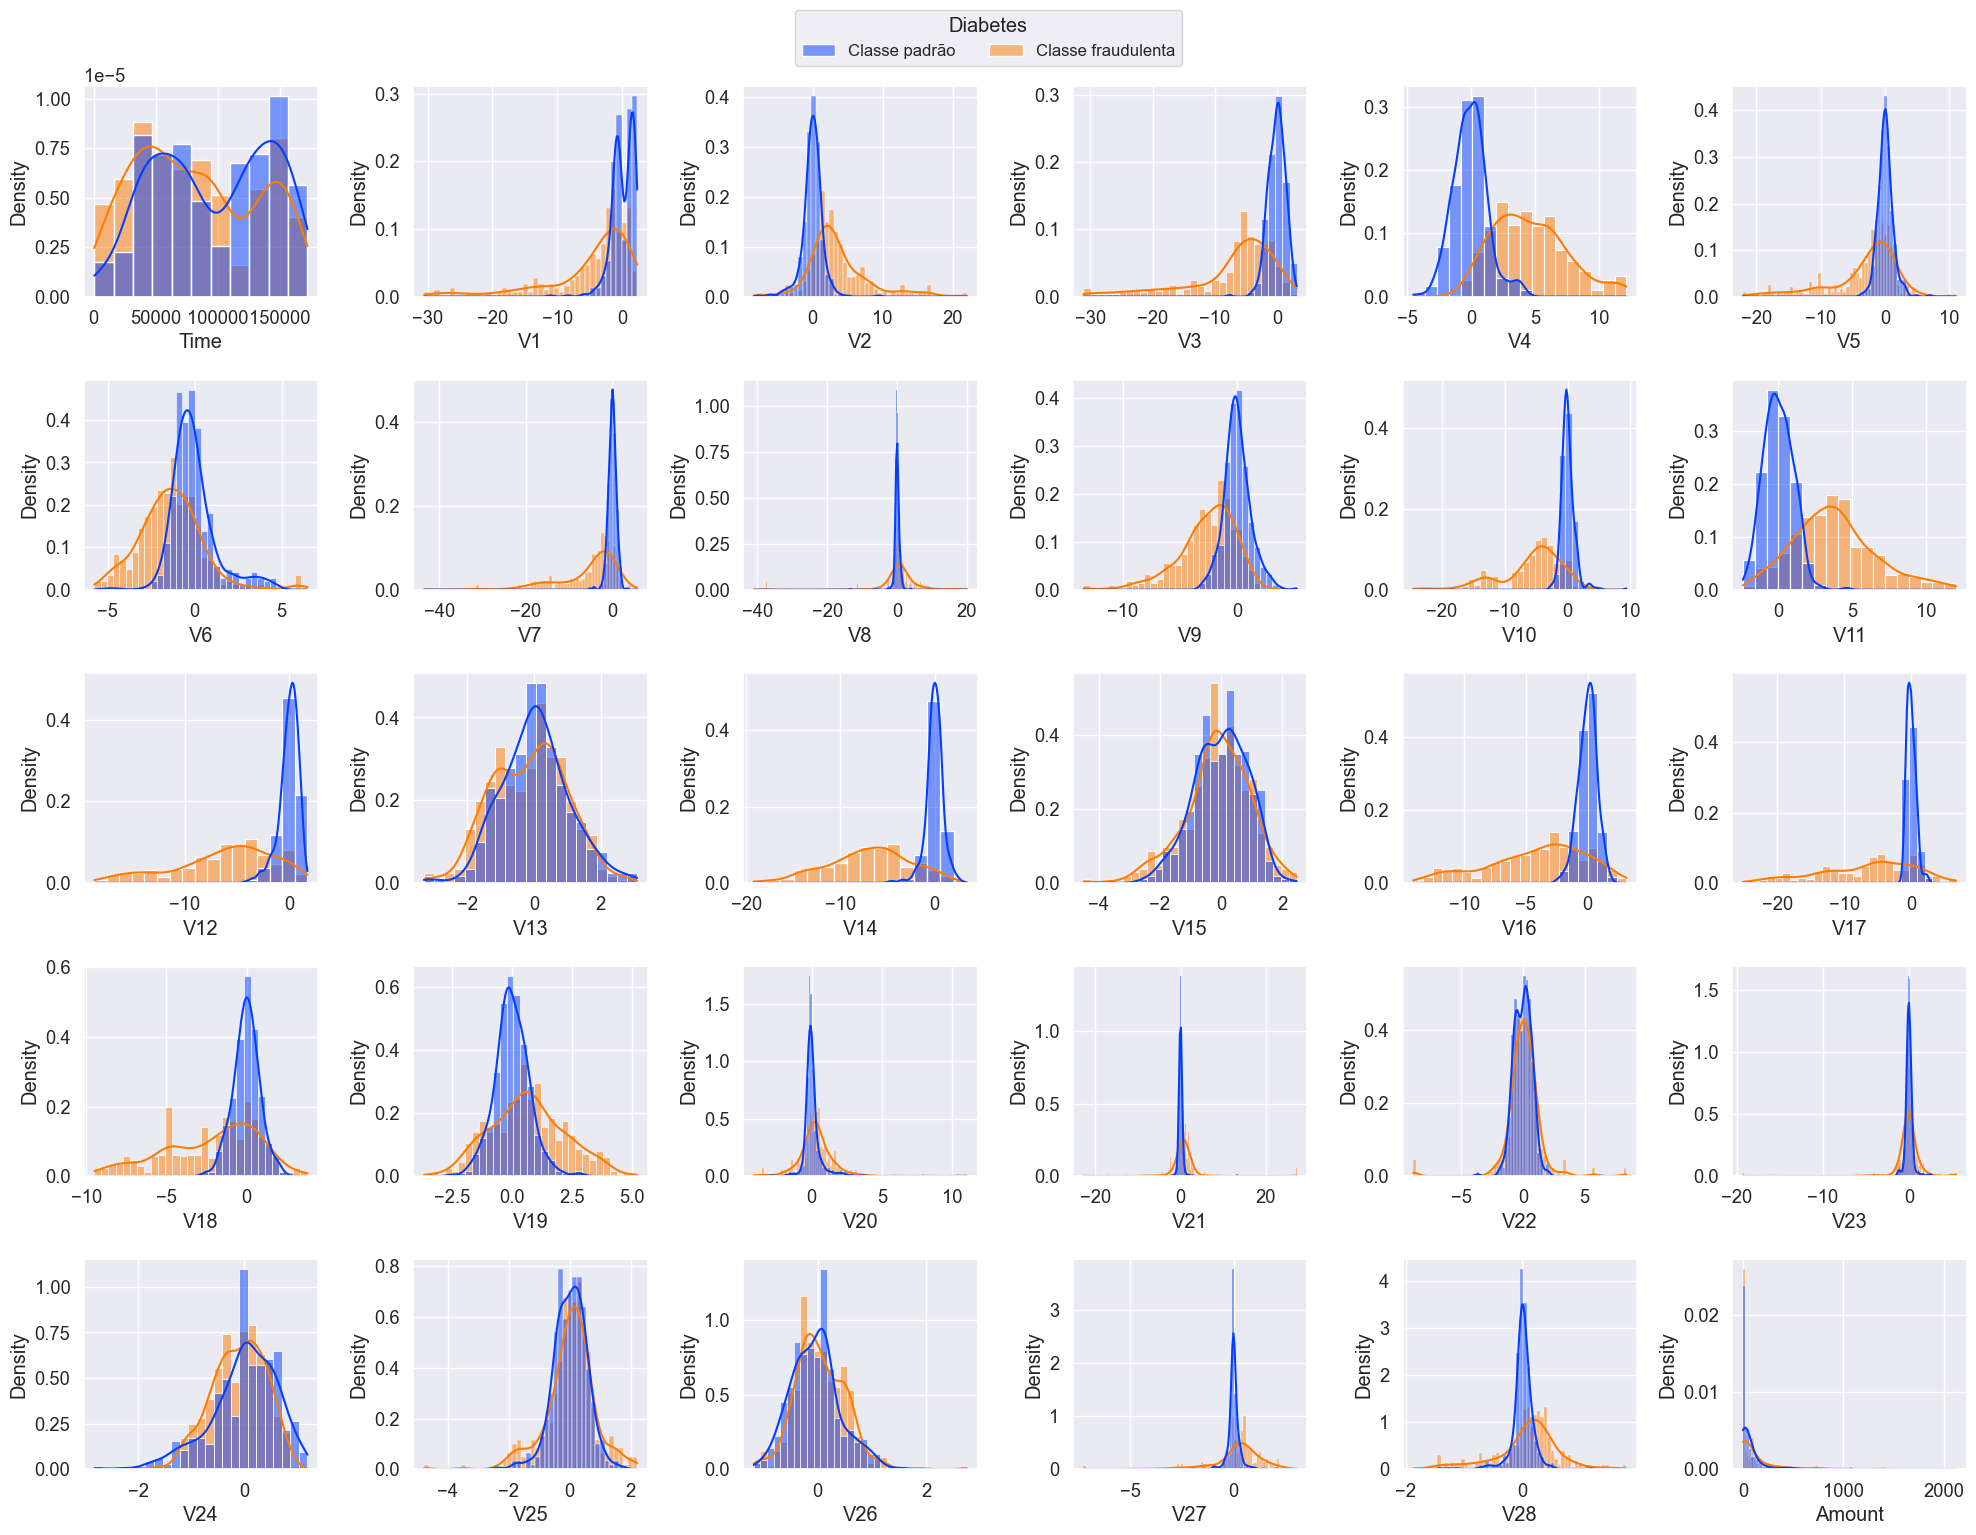

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=6,
                        figsize=(20,15))


for c, ax in zip(df_sample.columns, axs.flatten()):
    h = sns.histplot(
        data=df_sample, x=c,
        kde=True,
        hue="Class",
        stat="density", common_norm=False,
        ax=ax
    )


    legend = h.get_legend()
    legend.remove()

labels = ["Classe padrão", "Classe fraudulenta"]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 1.03), fontsize=12)



plt.tight_layout()
plt.show()

Nesse gráfico é possível notar que as distribuições de cada _feature_ são bem diferentes, há certa mistura entre as classes e poucas _features_ promovem uma padrão de "sino" digno de uma distribuição normal. As escalas de densidade denunciam certo efeito de _outliears_ em várias delas, o que pode ser alvo de considerações futuras: eliminação de _features_ ou limpeza de registros.

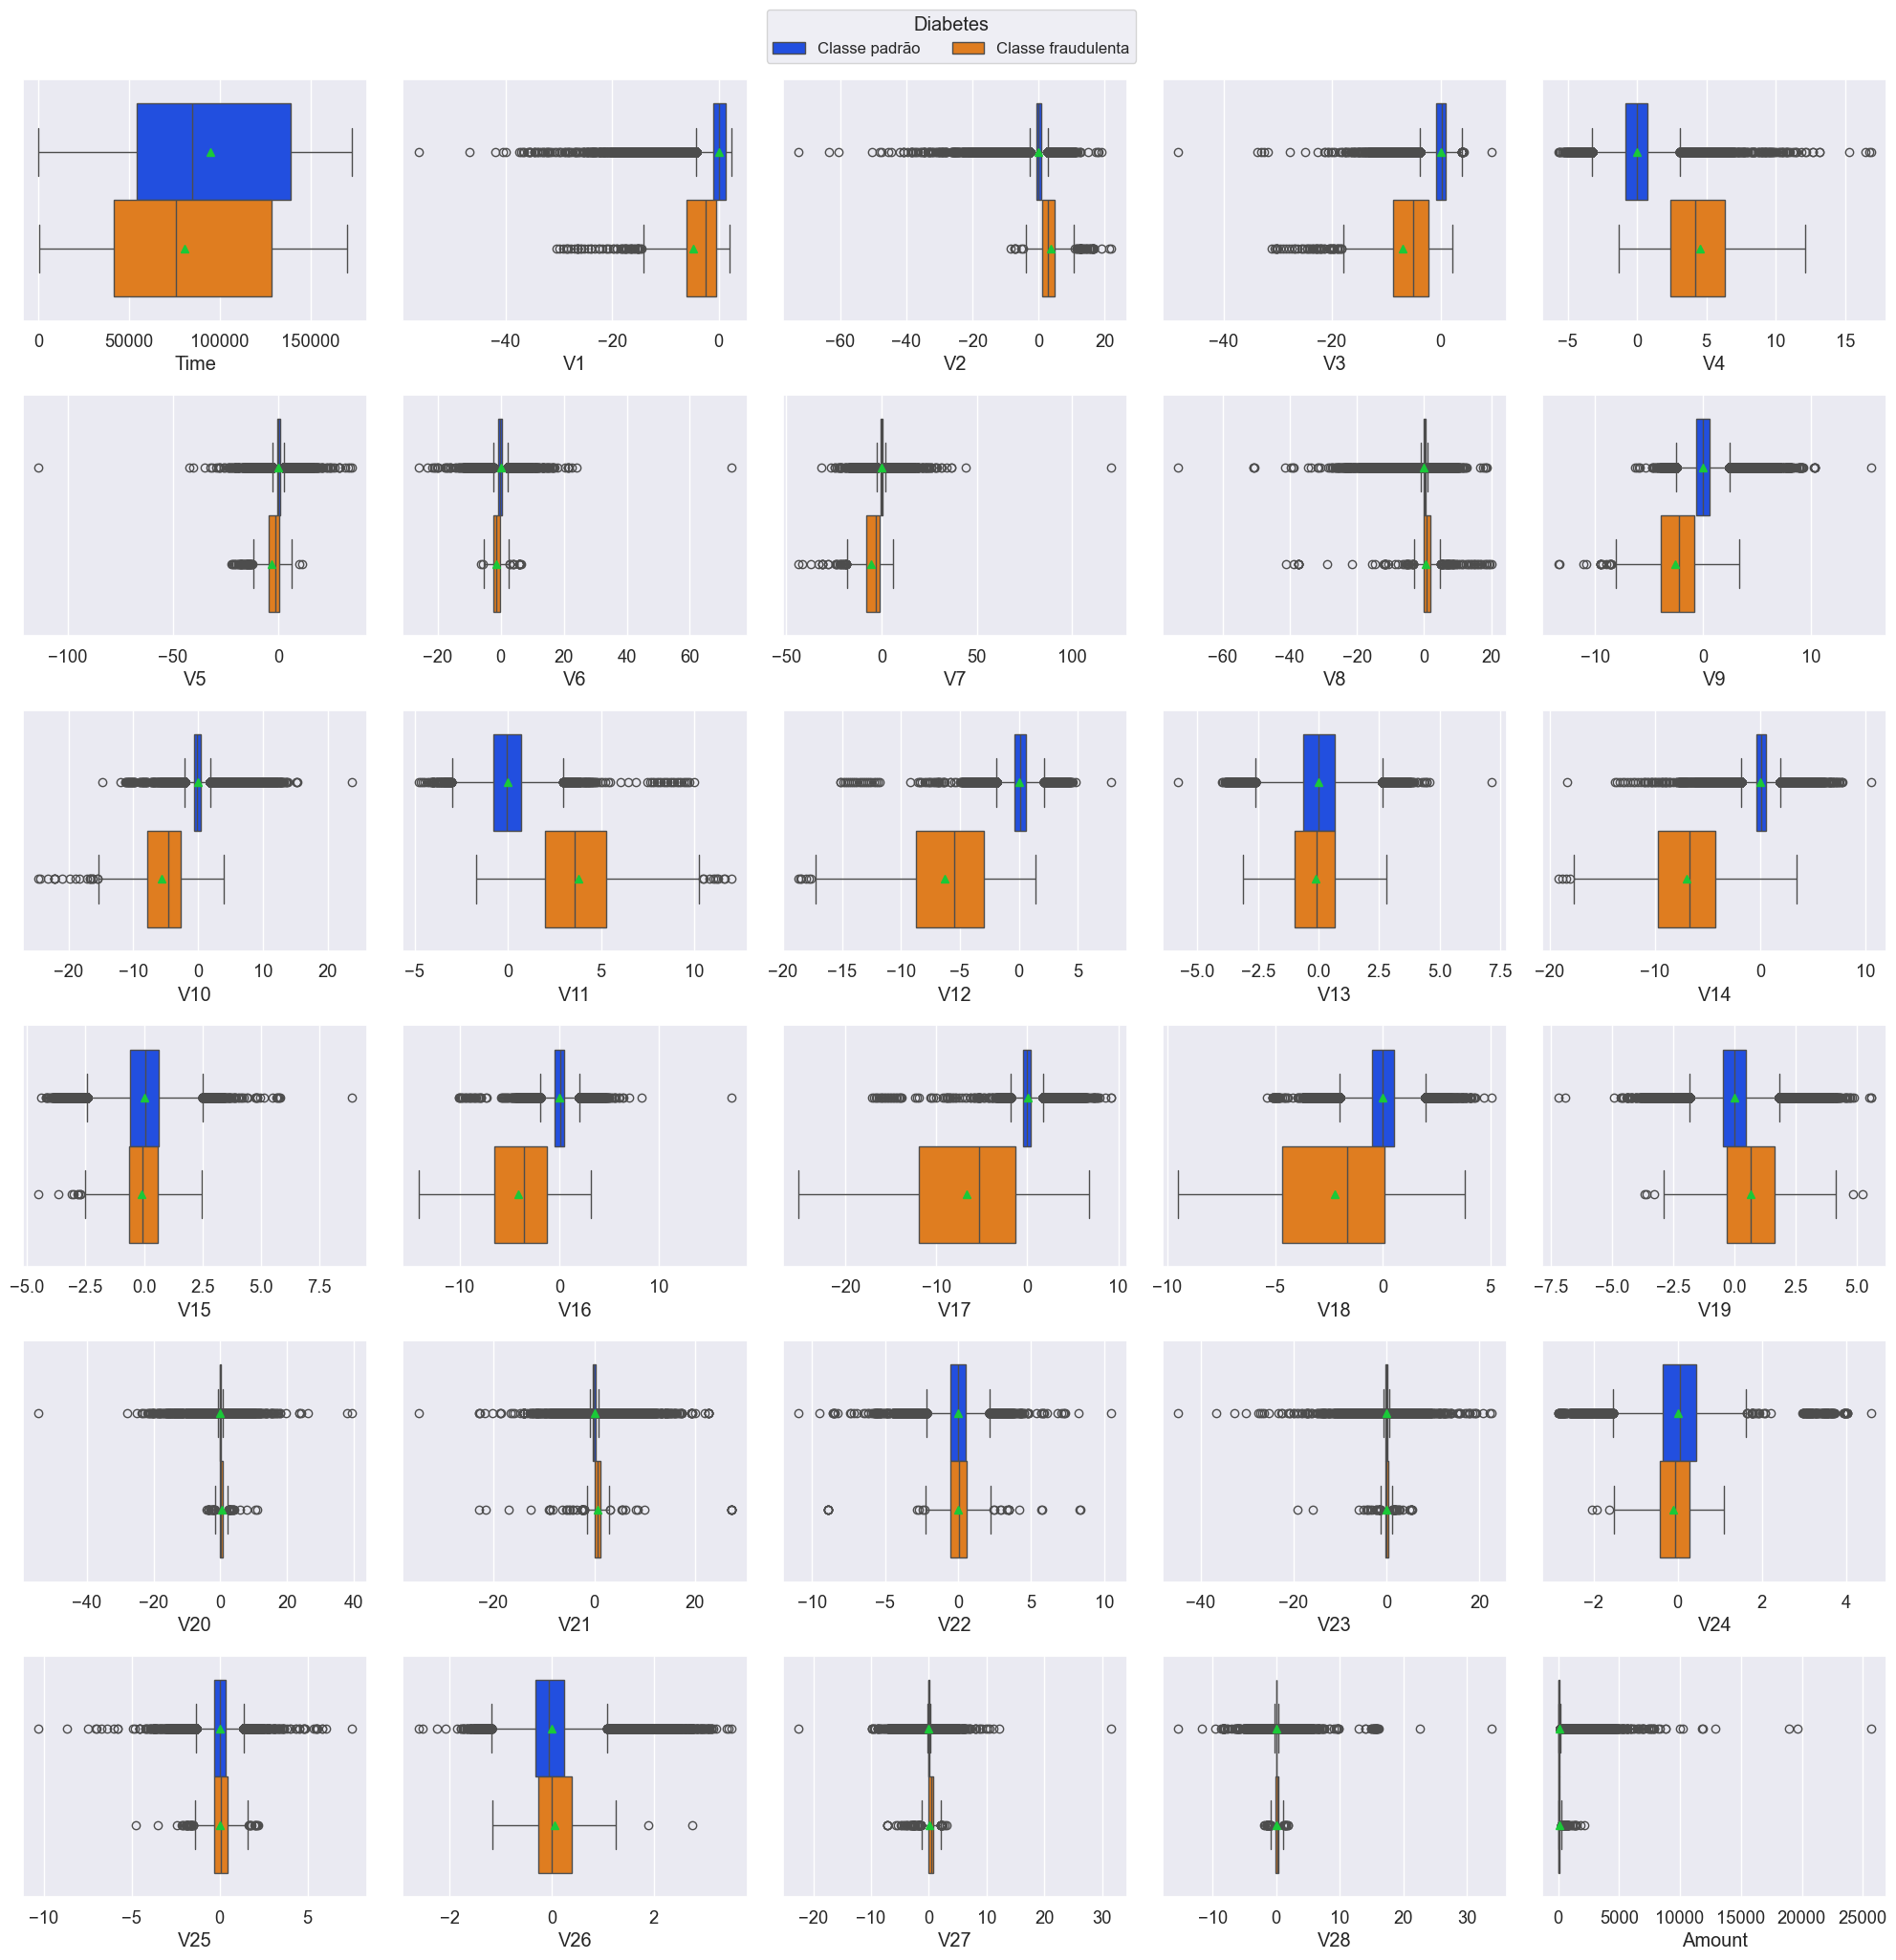

In [13]:
fig, axs = plt.subplots(ncols=5, nrows=6,
                        figsize=(20, 20))


for ax, c in zip(axs.flatten(), df.columns):
    b = sns.boxplot(
        data=df, x=c,
        hue="Class",
        showmeans=True,
        ax=ax
    )

    legend = b.get_legend()
    legend.remove()

labels = ["Classe padrão", "Classe fraudulenta"]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 1.03), fontsize=12)

plt.tight_layout()
plt.show()

Nos dois gráficos acima, é possível notar certo destaque a _outliers_, talvez bem característico de movimentações monetárias. Contudo, especialmente com os gráficos de boxplot é notável a capacidade de algumas _features_ em separar as classes, tais como, `V4`, `V10`, `V14` etc.

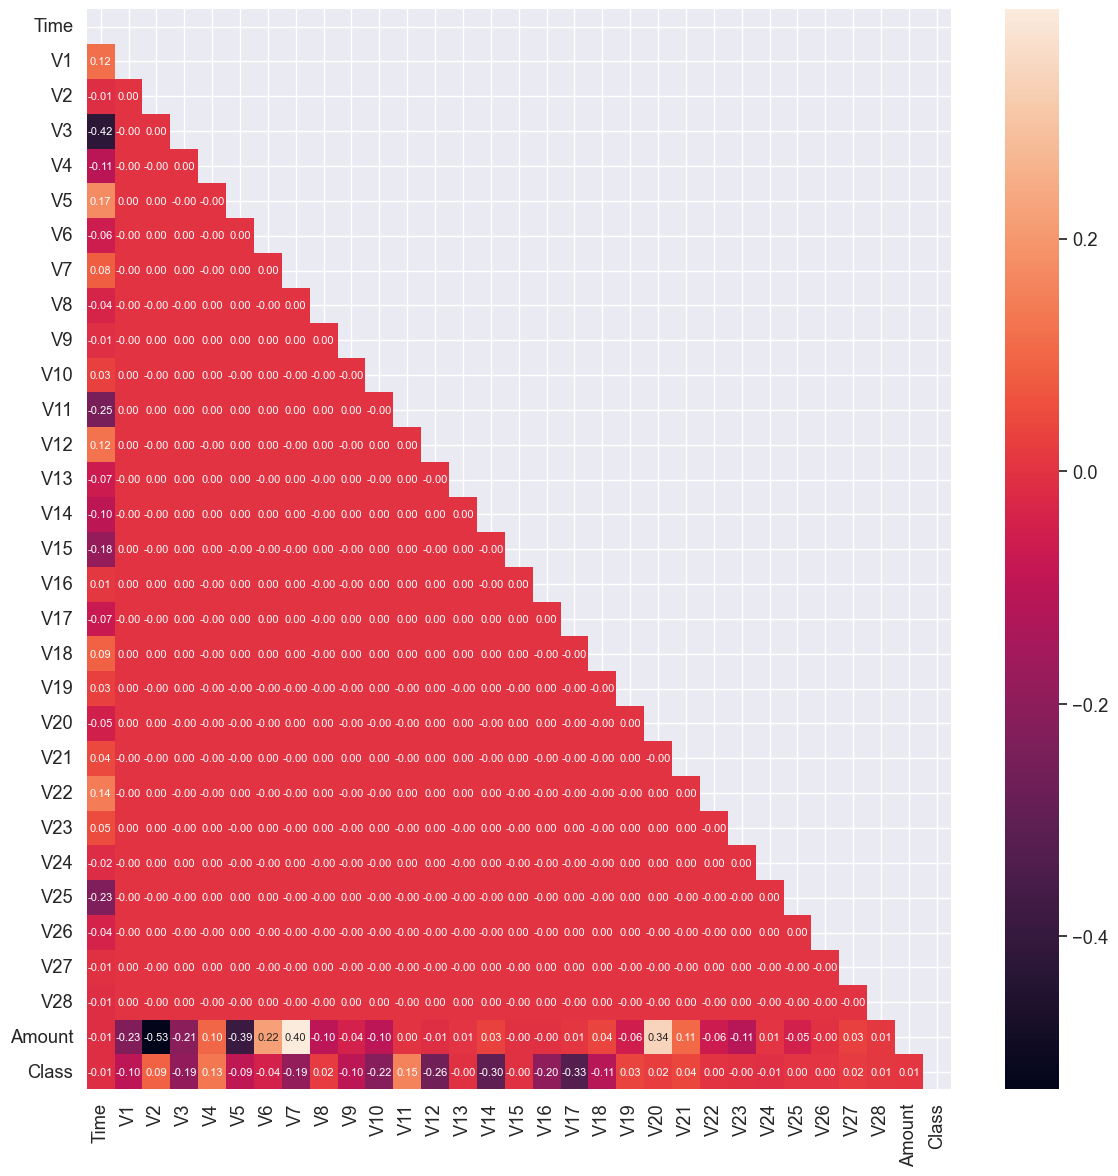

In [14]:
df_corr = df.corr()
mask = np.triu(df_corr)

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(data=df_corr,
            annot=True, fmt='.2f', annot_kws={'fontsize': 8},
            mask=mask,
            ax=ax)


plt.tight_layout()
plt.show()

- Desafios

Como descrito na própria página da base no Kaggle, houve tratamento de **PCA**, isso reflete claramente na não-linearidade dos vetores, ou seja, correlação baixíssima (virtualmente zero) para a maior parte das _features_ como se vê. 

É importante destacar que a correlação de _person_ (método padrão da função `corr()`) é bem sensível a _outliers_. A ``correlação de _Pearson_`` é extremamente sensível à "massa" de dados e à linearidade, o que a torna pouco confiável quando se tem uma classe que representa 99,9% do dataset (transações normais) e outra que representa apenas 0,1% (fraudes). A fórmula de _Pearson_ baseia-se no cálculo da ``covariância`` e do ``desvio padrão``, que são centrados na ``média aritmética``.

Ainda assim, é possível notar certa influência no _target_ (coluna Class), entretato, não de todas. Isso pode indicar certa abertura para limpeza de colunas da nossa base, como já mostramos desejo antes, o que levará a um modelo mais simples e economia de recusros computacionais.

- Teste U de Mann-Whitney

Nesse contexto, podemos usar o teste estatistico de (teste U de ) Mann-Whitney para validar se faz sentido manter todas as colunas. Esse teste é um teste estatístico ``não-paramétrico`` (sem assumir distribuição normal dos dado e sem usar parâmetros da distribuição, como medidas resumo e dispersão) fundamental para comparar duas amostras independentes, determinando se elas vêm da mesma população.

Esse teste utiliza a lógica de ranqueamento para ordenar os dados de cada _feature_ e usa a posição para o cálculo. Assim, ao invés de usar a ``média`` ou ``desvio padrão`` da distribuição, que poderia ser influenciada pelos _outliers_, ele utiliza da soma das posições para encontrar os "grupos", como os ``boxplots`` que vimos, assim, valores diferentes do teste para cada classe podem indicar boa separação entre elas.

**Observação:** Apesar do teste t ser robusto para muitos registros, o teste não paramétrico foi escolhido, pois com os vários _outliers_ pode parecer prudente evitar qualquer ``medida resumo como parâmetro``.

Esse teste pode indicar se as diferenças entre as colunas são significativas, e se assim forem, podemos mantê-las. **Esse será um parâmetro objetivo aliado as visões dos gráficos acima, em especial, o _boxplot_**

In [15]:
coluna_target = "Class"
features = df.columns.drop(coluna_target).to_list()


analise_mw = {}
classes = df[coluna_target].unique()

alfa = 0.01 # sendo bem restritivo, devido a quantidade de features e dados elevados
agrupamento = df.groupby(coluna_target)

In [16]:
for coluna in features:
    grupo1 = agrupamento.get_group(classes[0])[coluna]
    grupo2 = agrupamento.get_group(classes[1])[coluna]

    estatistica_mw, pvalue_mw = mannwhitneyu(grupo1, grupo2)

    analise_mw[coluna] = {
        "pvalue": pvalue_mw,
        "estatistica": estatistica_mw,
        "relacao_significativa": pvalue_mw < alfa,
    }

df_mw = pd.DataFrame(analise_mw).T

df_mw

,pvalue,estatistica,relacao_significativa
Time,0.0,81310602.0,True
V1,0.0,111193870.0,True
V2,0.0,20289296.0,True
V3,0.0,127583455.0,True
V4,0.0,8636598.0,True
V5,0.0,99256726.0,True
V6,0.0,107291012.0,True
V7,0.0,116915822.0,True
V8,0.0,47862020.0,True
V9,0.0,118073844.0,True


In [17]:
# Features a serem desconsideradas

df_mw[df_mw['relacao_significativa'] == False]

,pvalue,estatistica,relacao_significativa
V13,0.051215,73493959.0,False
V15,0.129508,72703847.0,False
V22,0.266395,67916421.0,False
V25,0.012463,65388547.0,False


Portanto, antes de seguir para uma proposta de tratamento dos outliers, vamos considerar excluir essas colunas pouco significativas.

In [18]:
df = df.drop(columns=df_mw[df_mw['relacao_significativa'] == False].index)
df.shape

(284807, 27)

- Tratando _outliers_

Vamos adotar uma estratégia de limpeza de _outliers_ apenas da classe majoritária. Apesar de uma escolha com pouca frequência, temos dois bons motivos:

1. O desbalanceamento da base é severo: temos aproximadamente 1% de registros da classe minoritária. Executar uma limpeza de _outliers_ indiscriminada pode promover um maior desbalanço E/OU excluir registros relevantes da classe minoritária (há o que se dizer que **todos** os registros da classe são importantes, visto severo desbalanço);

2. A classe majoritária aparenta ter os _outliers_ mais severos, ou seja, com maiores distâncias das medianas, primeiro quartil e último quatil, como se pode ver facilmente no gráfico de _`boxplot`_.

Nosso ``objetivo`` é entender se mudar a propoção entre as classes pode ter um impacto positivo nos modelos.

Adotaremos agora uma abordagem ``multivariada para a limpeza de dados``, escolha motivada pela alta proporção de _outliers_ e pelo severo desbalanceamento da nossa base. Apesar da palavra "_outlier_" ser fonte de terror para alguns, no nosso caso, é **característica fundamental do nosso conjunto de dados**. 

- O problema dos métodos iterativos

É comum o uso de abordagens técnicas de limpeza baseadas em loops (for), em que os _outliers_ são removidos coluna por coluna. Entretanto, apesar de simples, esse método reduz o controle e a previsibilidade do processo. A cada iteração, os limites estatísticos (como os do boxplot) são recalculados, tornando difícil garantir que apenas os registros pretendidos sejam excluídos. Além disso, esse efeito acumulativo funciona como 'juros compostos', resultando em uma limpeza agressiva que frequentemente exclui muito mais linhas do que o desejado. As consequências incluem a distorção desproporcional dos limites entre as primeiras e últimas colunas, a perda de registros importantes e alterações indesejadas nas distribuições originais.

Uma solução mais consistente e transparente é o ``método multivariado``. O modelo de referência ``Isolation Forest`` busca compreender o padrão global da base, considerando **múltiplas colunas simultaneamente** para identificar anomalias. Por exemplo: um registro com '14 anos' é normal, assim como uma 'Renda de R$ 50.000' pode ser normal para um adulto; contudo, a combinação '14 anos + R$ 50.000' constitui um __outlier__ multivariado nítido.

Além do mais, este método permite o **controle direto** sobre o volume de dados a ser removido. Dessa forma, garantimos a preservação do ``máximo de informação relevante`` e mitigamos distorções imprevisíveis em colunas específicas, assegurando a **integridade estatística do conjunto de dados."**

**Observação importante:** como vamos tratar de um modelo de Machine Learning, devemos nos preocupar com Data Lakage! Assim, serão separadas porções de treino e teste para que no próximo notebook tenhamos um última validação do modelo vencedor de forma mais robusta, com dados inéditos e inspeção de Data Lakage. 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1), 
    df['Class'], 
    test_size=0.25, 
    stratify=df['Class'], 
    random_state=42
)

# Isso garante que o Isolation Forest nunca veja o X_test
df_train = pd.concat([X_train, y_train], axis=1)

df_maj_train = df_train[df_train['Class'] == 0]
df_min_train = df_train[df_train['Class'] == 1]

In [20]:
# Garantindo que a lista de colunas não contenha o alvo
colunas = df.columns.drop("Class")

iso_forest = IsolationForest(
    n_estimators=100, 
    contamination=0.1, 
    random_state=42, 
    n_jobs=-1  
)

previsoes = iso_forest.fit_predict(df_maj_train[colunas])

# O modelo retorna 1 para 'normal' e -1 para 'outlier'
mask_normais = (previsoes == 1)

df_maj_train_limpo = df_maj_train[mask_normais].copy()


df_train_final = pd.concat([df_maj_train_limpo, df_min_train]).reset_index(drop=True)

print(f"Registros de treino originais (Maj): {len(df_maj_train)}")
print(f"Desbalanço Original: {df['Class'].value_counts(normalize=True)[1]:.3%}")
print("------------------------")
print(f"Registros de treino após limpeza (Maj): {len(df_maj_train_limpo)}")
print(f"Novo desbalanço: {df_train_final['Class'].value_counts(normalize=True)[1]:.3%}")

Registros de treino originais (Maj): 213236
Desbalanço Original: 0.173%
------------------------
Registros de treino após limpeza (Maj): 191912
Novo desbalanço: 0.192%


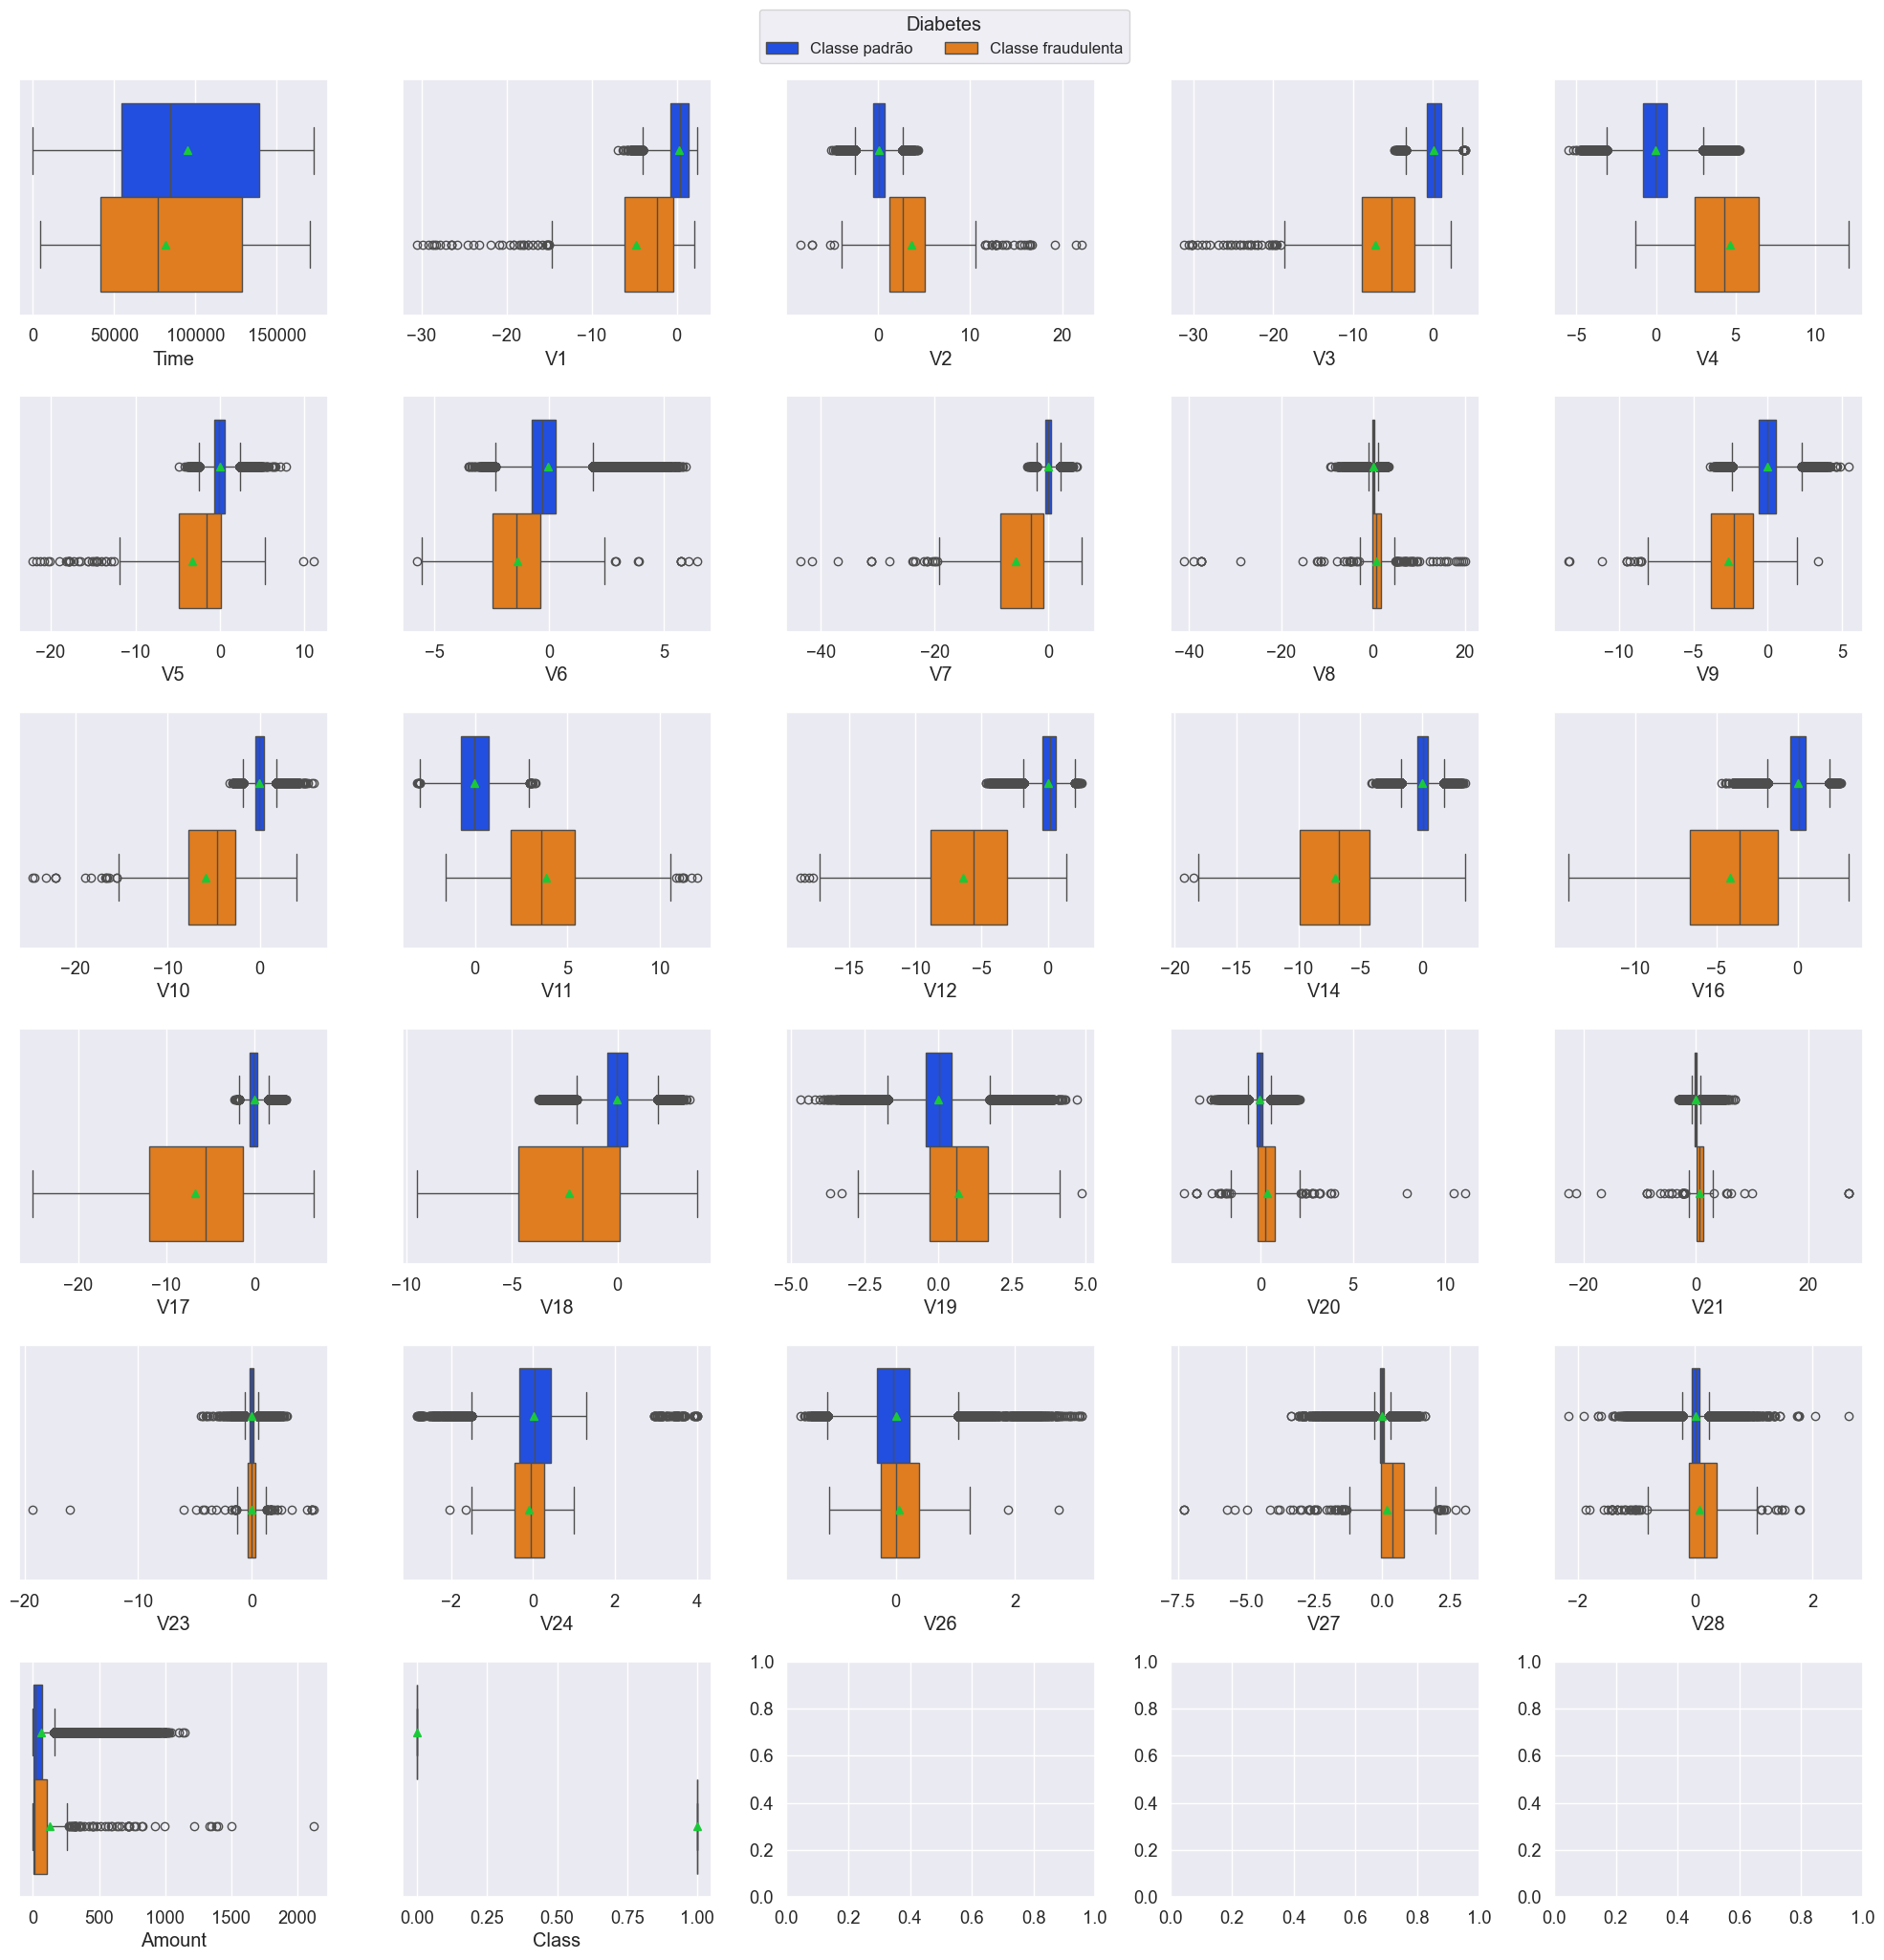

In [21]:
fig, axs = plt.subplots(ncols=5, nrows=6,
                        figsize=(20, 20))


for ax, c in zip(axs.flatten(), df.columns):
    b = sns.boxplot(
        data=df_train_final, x=c,
        hue="Class",
        showmeans=True,
        ax=ax
    )

    legend = b.get_legend()
    legend.remove()

labels = ["Classe padrão", "Classe fraudulenta"]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 1.03), fontsize=12)

plt.tight_layout()
plt.show()

In [22]:
DADOS_TRATADOS = PASTA_DADOS / 'crediticard_mult_var_treino'

df_train_final.to_parquet(DADOS_TRATADOS, index=False)

- Conclusões

1. Nenhuma alteração significafica na proporção entre as classes, porém muitos _outliers_ limpos (vide escala dos _boxplots_);
2. Tivemos um bom ajuste de escala nos `boxplots` em geral. Isso é um indício de que a limpeza foi significativa. É até mais perceptível  mais _outliers_ na classe minoritária do que antes.
3. Base ainda robusta, isso pode gerar um impacto nos modelos. Nesse contexto, vamos fazer algumas ``outras variações e testar no próximo notebook``. Essa é uma prática pouco comum nos estudos, em geral, privilegiam mais os modelos, porém não nos privaremos de uma análise comparativa ao menos superficial para entender o impacto do menor número de registros nessa base em específico (com muitos _outliers_).

In [23]:
outliers = [0.01, 0.05, 0.2, 0.3]
dict_train_limpos = {}

print(f"Registros originais (Maj): {len(df_maj_train)}")
print(f"Desbalanço Original: {df['Class'].value_counts(normalize=True)[1]:.3%}")
print("\n")

for o in outliers:

    iso_forest = IsolationForest(contamination=o, 
                                 random_state=42, 
                                 n_jobs=-1)


    p = iso_forest.fit_predict(df_maj_train[colunas])
    
    mask_n = (p == 1)
    df_maj_train_temp = df_maj_train[mask_n].copy()

    df_train_temp = pd.concat([df_maj_train_temp, df_min_train]).reset_index(drop=True)
    
    dict_train_limpos[f"train_limpo_{o}"] = df_train_temp
    
    print(f"--- Caso Treino: {o} ---")
    print(f"Registros originais (Maj): {len(df_train_temp)}")
    print(f"Novo desbalanço no treino: {df_train_temp['Class'].value_counts(normalize=True)[1]:.3%}")

Registros originais (Maj): 213236
Desbalanço Original: 0.173%


--- Caso Treino: 0.01 ---
Registros originais (Maj): 211472
Novo desbalanço no treino: 0.174%
--- Caso Treino: 0.05 ---
Registros originais (Maj): 202943
Novo desbalanço no treino: 0.182%
--- Caso Treino: 0.2 ---
Registros originais (Maj): 170958
Novo desbalanço no treino: 0.216%
--- Caso Treino: 0.3 ---
Registros originais (Maj): 149634
Novo desbalanço no treino: 0.247%


In [24]:
for nome, df_final in dict_train_limpos.items():

    nome_arquivo = f"creditcard_{nome}.parquet"
    
    DADOS_TRATADOS = PASTA_DADOS / nome_arquivo

    df_final.to_parquet(DADOS_TRATADOS, index=False)

In [25]:
df_test_final = pd.concat([X_test, y_test], axis=1)

arquivo_teste = "creditcard_TESTE_RESERVADO.parquet"
caminho_teste = PASTA_DADOS / arquivo_teste

df_test_final.to_parquet(caminho_teste, index=False)